In [ ]:
col_list = ["date","price"]
import pandas as pd
df = pd.read_csv("Wheat Flour Khulna Division.csv", usecols=col_list,parse_dates = ['date'])
df.head()

,date,price
0,2005-10-15,20.0
1,2005-11-15,19.0
2,2006-03-15,20.0
3,2006-04-15,20.5
4,2006-05-15,21.0


In [ ]:
df.describe()

,price
count,190.000000
mean,31.955706
std,5.208986
min,19.000000
25%,30.867825
50%,32.340000
75%,35.322475
max,43.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    190 non-null    datetime64[ns]
 1   price   190 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


In [ ]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2005-10-15,20.0
1,2005-11-15,19.0
2,2006-03-15,20.0
3,2006-04-15,20.5
4,2006-05-15,21.0


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from fbprophet import Prophet
m = Prophet(interval_width = 0.95, weekly_seasonality = False,yearly_seasonality = False)
m.fit(df)
#Check Interval Width between 0.75 to 0.95 and weekly Seasonality and Yearly Seasonality True\False

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


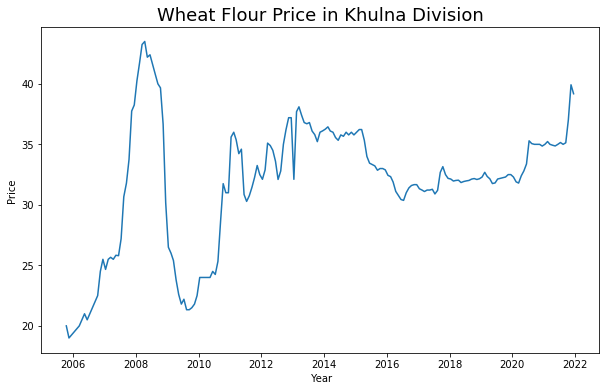

In [ ]:
plt.figure(facecolor='w',figsize=(10, 6))
plt.plot(df.ds,df.y)
plt.title('Wheat Flour Price in Khulna Division',size = 18)
plt.xlabel(' Year')
plt.ylabel('Price')
plt.show()

In [ ]:
future = m.make_future_dataframe(periods = 50,freq ='SMS')
forecast = m.predict(future)
forecast.tail(16)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
224,2023-06-01,34.375292,25.996210,42.927186,34.244722,34.517584,0.0,0.0,0.0,0.0,0.0,0.0,34.375292
225,2023-06-15,34.380088,25.346883,43.098392,34.244395,34.528939,0.0,0.0,0.0,0.0,0.0,0.0,34.380088
226,2023-07-01,34.385570,24.813823,43.846764,34.244369,34.540421,0.0,0.0,0.0,0.0,0.0,0.0,34.385570
227,2023-07-15,34.390367,25.622743,43.849035,34.244516,34.550064,0.0,0.0,0.0,0.0,0.0,0.0,34.390367
228,2023-08-01,34.396192,25.353284,43.327957,34.242260,34.564351,0.0,0.0,0.0,0.0,0.0,0.0,34.396192
229,2023-08-15,34.400989,25.031313,43.844211,34.240325,34.575491,0.0,0.0,0.0,0.0,0.0,0.0,34.400989
230,2023-09-01,34.406813,25.727735,43.587639,34.240136,34.591194,0.0,0.0,0.0,0.0,0.0,0.0,34.406813
231,2023-09-15,34.411610,25.308140,42.840081,34.240099,34.603476,0.0,0.0,0.0,0.0,0.0,0.0,34.411610
232,2023-10-01,34.417092,25.702208,43.346017,34.239128,34.616636,0.0,0.0,0.0,0.0,0.0,0.0,34.417092
233,2023-10-15,34.421889,25.633869,42.681904,34.238413,34.629480,0.0,0.0,0.0,0.0,0.0,0.0,34.421889


In [ ]:
df.shape

(190, 2)

In [ ]:
future.shape

(240, 1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Forcasting Price of Wheat Flour in Khulna Division')

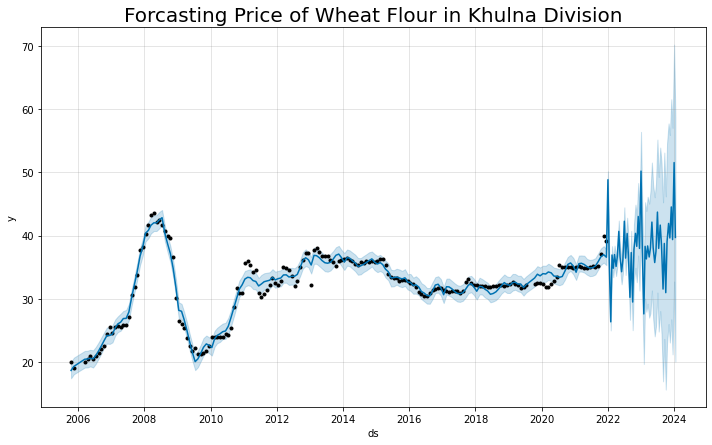

In [ ]:
m1 = Prophet(changepoint_prior_scale=0.5)
forecast1 = m1.fit(df).predict(future)
fig4 = m1.plot(forecast1)
a = fig4.gca()
a.set_title('Forcasting Price of Wheat Flour in Khulna Division',size=20)

In [ ]:
from fbprophet.diagnostics import cross_validation
cv = cross_validation(m,initial = '100 days', period='50 days', horizon='300 days')

INFO:fbprophet:Making 111 forecasts with cutoffs between 2006-01-28 00:00:00 and 2021-02-18 00:00:00


  0%|          | 0/111 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fb

In [ ]:
cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1076,2021-08-15,33.277168,23.995898,42.357530,35.00,2021-02-18
1077,2021-09-15,33.275852,24.769230,41.916560,35.13,2021-02-18
1078,2021-10-15,33.274578,25.039920,42.240003,37.02,2021-02-18
1079,2021-11-15,33.273261,24.062833,42.554684,39.92,2021-02-18
1080,2021-12-15,33.271988,24.177335,43.267348,39.18,2021-02-18


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_pm = performance_metrics(cv)
E = pd.DataFrame(df_pm)
E.to_csv('/content//drive//MyDrive/Dataset//Wheat Khulna PM.csv')
#df_pm

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



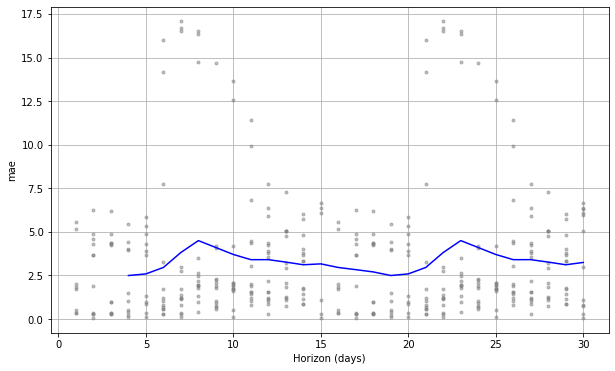

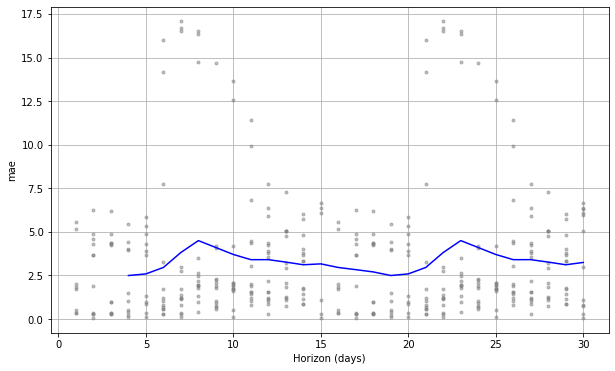

In [ ]:
 from fbprophet.plot import plot_cross_validation_metric
 plot_cross_validation_metric(cv,metric = 'mae')

In [1]:
col_list = ["date","price"]
import pandas as pd
df = pd.read_csv("Wheat Flour Khulna Division.csv", usecols=col_list,parse_dates = ['date'])
df.head()

,date,price
0,2005-10-15,20.0
1,2005-11-15,19.0
2,2006-03-15,20.0
3,2006-04-15,20.5
4,2006-05-15,21.0


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

from darts import TimeSeries
from darts.models import (
    NaiveDrift,
    NaiveSeasonal,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    RegressionEnsembleModel,
    RegressionModel,
    Theta,
    FFT,
    RNNModel,
    NaiveEnsembleModel,
    NBEATSModel,
    TCNModel,
    AutoARIMA,
    TBATS
    
)

from darts.metrics import mae
from darts .utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis

import warnings
warnings.filterwarnings('ignore')

import logging 
logging.disable(logging.CRITICAL)

In [3]:
series = TimeSeries.from_dataframe(df, 'date','price',fill_missing_dates=True, freq='SM')
series.head()

<TimeSeries (DataArray) (date: 5, component: 1, sample: 1)>
array([[[20.]],

       [[nan]],

       [[19.]],

       [[nan]],

       [[nan]]])
Coordinates:
  * date       (date) datetime64[ns] 2005-10-15 2005-10-31 ... 2005-12-15
  * component  (component) object 'price'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

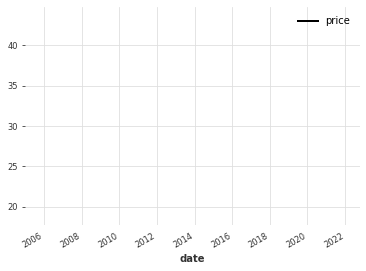

In [4]:
series.plot()

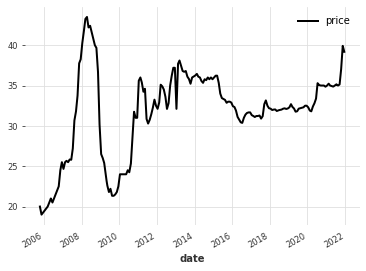

In [5]:
import darts
series = darts.utils.missing_values.fill_missing_values(series, fill='auto',)
series.plot()

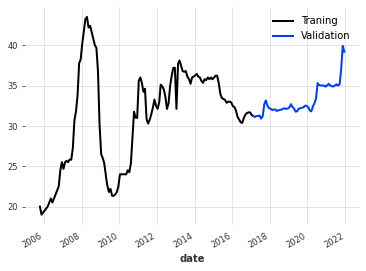

In [6]:
train, val = series.split_after(0.7)
train.plot(label = 'Traning')
val.plot(label = 'Validation')
plt.legend()

In [7]:
from darts.dataprocessing.transformers import Scaler

scaler = Scaler()
train_scaled = scaler.fit_transform([train])

#train_scaled.plot()


Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

TCNModel = MAE :  0.8663613267263991


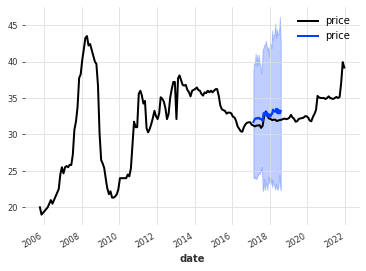

In [8]:
from darts.utils.likelihood_models import LaplaceLikelihood

model = TCNModel(
    input_chunk_length=24,
    output_chunk_length=12,
    random_state=42,
    likelihood=LaplaceLikelihood(),
)

model.fit(train_scaled, epochs=400, verbose=True);

pred = model.predict(n=36, num_samples=500)

# scale back:
pred = scaler.inverse_transform(pred)

series.plot()
pred.plot()

print("TCNModel = MAE : ",mae(series,pred))

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

NBEATSModel = MAE :  2.3485975140158857


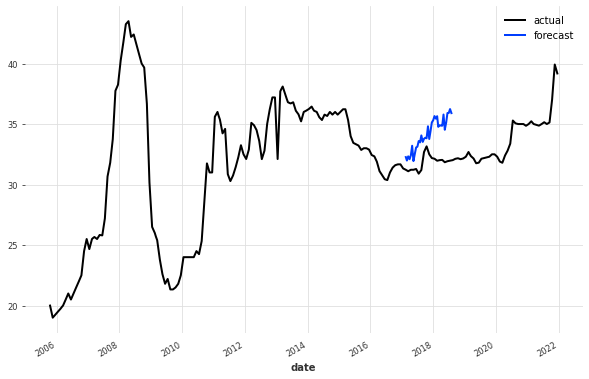

In [9]:
from darts.models import NBEATSModel

model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42)

model.fit(train_scaled, epochs=50, verbose=True);

pred = model.predict(n=36)


# scale back:
pred = scaler.inverse_transform(pred)

plt.figure(figsize=(10, 6))
series.plot(label="actual")
pred.plot(label="forecast")


print("NBEATSModel = MAE : ",mae(series,pred))

In [10]:
def evaluate_model(m):
    m.fit(train)
    forecast = m.predict(len(val))
    print("Model {} obtains MAE :{:}".format(m,mae(val,forecast)))

#evaluate_model(ExponentialSmoothing())
evaluate_model(TBATS())
evaluate_model(AutoARIMA())
evaluate_model(Theta())
evaluate_model(NaiveDrift())
evaluate_model(NaiveSeasonal())
evaluate_model(Prophet())
evaluate_model(ARIMA())
#evaluate_model(RegressionEnsembleModel())
#evaluate_model(RegressionModel())
evaluate_model(FFT())

Model (T)BATS obtains MAE :1.8375910850731632
Model Auto-ARIMA obtains MAE :2.118834297706484
Model Theta(2) obtains MAE :3.893272890598543
Model Naive drift model obtains MAE :0.9334298861450148
Model Naive seasonal model, with K=1 obtains MAE :1.8905213675213686
Model Prophet obtains MAE :1.7027740163312304
Model ARIMA(12, 1, 0) obtains MAE :2.20510271387442
Model FFT(nr_freqs_to_keep=10, trend=None) obtains MAE :8.502015975454531


  0%|          | 0/155 [00:00<?, ?it/s]

NaiveEnsembleModel = MAE =  0.6179453823932695


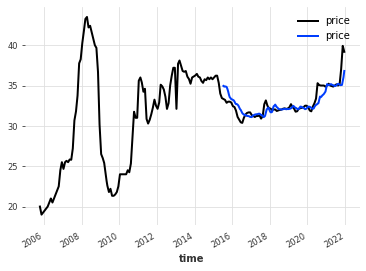

In [11]:
from darts.models import NaiveEnsembleModel

models = [NaiveDrift(), NaiveSeasonal(12)]

ensemble_model = NaiveEnsembleModel(models=models)

backtest = ensemble_model.historical_forecasts(
    series, start=0.6, forecast_horizon=3, verbose=True
)

print("NaiveEnsembleModel = MAE = " , (mae(backtest, series)))
series.plot()
backtest.plot()

Training: 0it [00:00, ?it/s]

  0%|          | 0/155 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

RNNModel = MAE =  0.8798933115639431


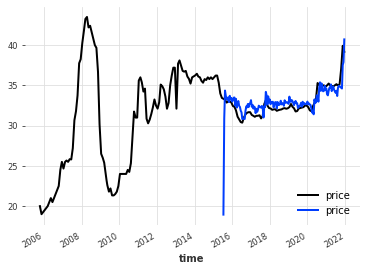

In [12]:
from darts.models import RNNModel

model = RNNModel(input_chunk_length=4)


model.fit(train_scaled)

backtest = model.historical_forecasts(series,start=0.6, forecast_horizon=3,verbose=True)
print("RNNModel = MAE = " , (mae(backtest, series)))
series.plot()
backtest.plot()